<a href="https://colab.research.google.com/github/Ivanova-Daria/labs/blob/main/%D0%9B%D0%B0%D0%B1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вариант 9

In [ ]:
import requests 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import  qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson


# Подготовка к анализу

In [ ]:
url='https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_Malaysia'
req=requests.get(url)
data=pd.read_html(req.text)
df=data[1]

In [ ]:
df['Gross (RM)']=df['Gross (RM)'].str.replace(r"million","")
df['Gross (RM)']=df['Gross (RM)'].astype('float64')
df.loc[:,'Gross (RM)'] *= 1000000 
df['Gross (RM)']=df['Gross (RM)'].astype('int64')
df['Budget (RM)']=df['Budget (RM)'].str.replace(r"million","")
df['Budget (RM)']=df['Budget (RM)'].astype('float64')
df.loc[:,'Budget (RM)'] *= 1000000 
df['Budget (RM)']=df['Budget (RM)'].astype('int64')
a = df.loc[0:6,'Year'].map(lambda x: str(x)[:-3])
b = df.loc[7:8,'Year'].map(lambda x: str(x)[:-4])
df.loc[0:6,'Year']= a
df.loc[7:8,'Year']= b
df['Year']=df['Year'].astype('int64')
df

,Rank,Film,Gross (RM),Budget (RM),Year
0,1,Munafik 2,48000000,2500000,2018
1,2,Hantu Kak Limah,36230000,1200000,2018
2,3,Ejen Ali: The Movie,30050000,6500000,2019
3,4,BoBoiBoy Movie 2,29570000,7000000,2019
4,5,PASKAL,28980000,10000000,2018
5,6,Upin & Ipin: Keris Siamang Tunggal,26190000,20000000,2019
6,7,Polis Evo 2,22450000,8000000,2018
7,8,Munafik,19040000,1600000,2016
8,9,Abang Long Fadil 2,18150000,3200000,2017
9,10,Polis Evo,17740000,2400000,2015


# Анализ переменной Budget (RM)

Визуальные проверки нормальности

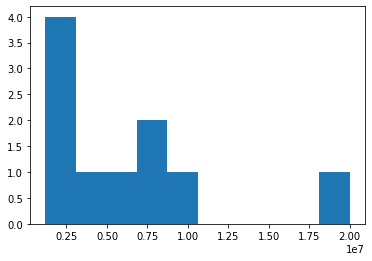

In [ ]:
plt.hist(df['Budget (RM)'])
plt.show()

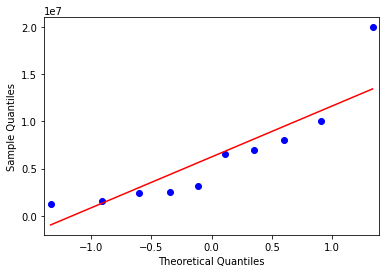

In [ ]:
qqplot(df['Budget (RM)'],line='s')
plt.show()

Статистические тесты нормальности

In [ ]:
stat, p = shapiro(df['Budget (RM)'])
print('Statistics=%.3f, p=%.3f'%(stat,p))
if p> 0.05:
  print('Sample looks Gaussian')
else :
  print('Sample does not look Gaussian')

Statistics=0.815, p=0.022
Sample does not look Gaussian


In [ ]:
stat, p = normaltest(df['Budget (RM)'])
print('Statistics=%.3f, p=%.3f'%(stat,p))
if p> 0.05:
  print('Sample looks Gaussian')
else :
  print('Sample does not look Gaussian')

Statistics=10.031, p=0.007
Sample does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
result = anderson(df['Budget (RM)'])
print('Statistic: %.3f'% result.statistic)
p=0
for i in range(len(result.critical_values)):
  if result.statistic<result.critical_values[i]:
    print('%.3f: %.3f, data looks normal' %(result.significance_level[i], result.critical_values[i]))
  else:
     print('%.3f: %.3f, data does not look normal' %(result.significance_level[i], result.critical_values[i]))

Statistic: 0.697
15.000: 0.501, data does not look normal
10.000: 0.570, data does not look normal
5.000: 0.684, data does not look normal
2.500: 0.798, data looks normal
1.000: 0.950, data looks normal


# Анализ переменной Year
---



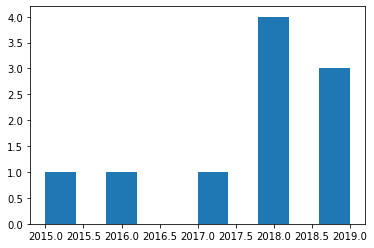

In [ ]:
plt.hist(df['Year'])
plt.show()

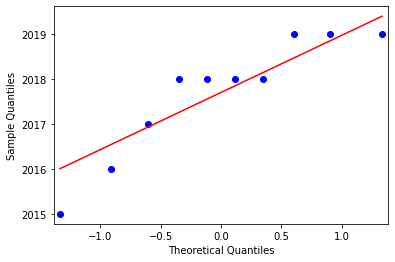

In [ ]:
qqplot(df['Year'],line='s')
plt.show()

In [ ]:
stat, p = shapiro(df['Year'])
print('Statistics=%.3f, p=%.3f'%(stat,p))
if p> 0.05:
  print('Sample looks Gaussian')
else :
  print('Sample does not look Gaussian')

Statistics=0.855, p=0.067
Sample looks Gaussian


In [ ]:
stat, p = normaltest(df['Year'])
print('Statistics=%.3f, p=%.3f'%(stat,p))
if p> 0.05:
  print('Sample looks Gaussian')
else :
  print('Sample does not look Gaussian')

Statistics=2.704, p=0.259
Sample looks Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
result = anderson(df['Year'])
print('Statistic: %.3f'% result.statistic)
p=0
for i in range(len(result.critical_values)):
  if result.statistic<result.critical_values[i]:
    print('%.3f: %.3f, data looks normal' %(result.significance_level[i], result.critical_values[i]))
  else:
     print('%.3f: %.3f, data does not look normal' %(result.significance_level[i], result.critical_values[i]))

Statistic: 0.644
15.000: 0.501, data does not look normal
10.000: 0.570, data does not look normal
5.000: 0.684, data looks normal
2.500: 0.798, data looks normal
1.000: 0.950, data looks normal


# Анализ переменной Gross (RM)
---

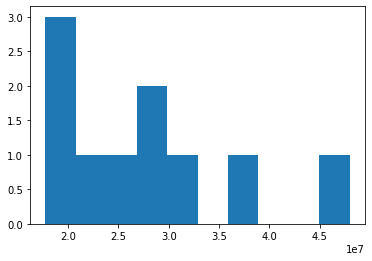

In [ ]:
plt.hist(df['Gross (RM)'])
plt.show()

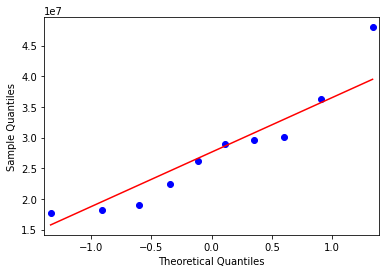

In [ ]:
qqplot(df['Gross (RM)'],line='s')
plt.show()

In [ ]:
stat, p = shapiro(df['Gross (RM)'])
print('Statistics=%.3f, p=%.3f'%(stat,p))
if p> 0.05:
  print('Sample looks Gaussian')
else :
  print('Sample does not look Gaussian')

Statistics=0.899, p=0.211
Sample looks Gaussian


In [ ]:
stat, p = normaltest(df['Gross (RM)'])
print('Statistics=%.3f, p=%.3f'%(stat,p))
if p> 0.05:
  print('Sample looks Gaussian')
else :
  print('Sample does not look Gaussian')

Statistics=3.765, p=0.152
Sample looks Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [ ]:
result = anderson(df['Gross (RM)'])
print('Statistic: %.3f'% result.statistic)
p=0
for i in range(len(result.critical_values)):
  if result.statistic<result.critical_values[i]:
    print('%.3f: %.3f, data looks normal' %(result.significance_level[i], result.critical_values[i]))
  else:
     print('%.3f: %.3f, data does not look normal' %(result.significance_level[i], result.critical_values[i]))

Statistic: 0.396
15.000: 0.501, data looks normal
10.000: 0.570, data looks normal
5.000: 0.684, data looks normal
2.500: 0.798, data looks normal
1.000: 0.950, data looks normal
